 # Лабораторная работа 3. Обучение без учителя

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_03.ipynb.

## Кластеризация

![Digits](https://i.imgur.com/DINSGXS.png)

Задача [кластеризации](https://en.wikipedia.org/wiki/Cluster_analysis) данных является одним из примеров задач обучения "без учителя". Она заключается в разбиении множества объектов на кластеры, при этом предполагается, что внутри одного кластера будут находиться похожие между собой объекты. Одним из примеров методов кластеризации является алгоритм [KMeans](https://en.wikipedia.org/wiki/K-means_clustering).

### Выбор числа кластеров

Для некоторых алгоритмов кластеризации число кластеров является гиперпараметром (например, в случае KMeans). Поэтому для выбора количества кластеров может быть использован следующий подход: при фиксированной метрике качества для разного числа кластеров вычисляется кластеризация и выбирается то количество кластеров, начиная с которого качество "стабилизируется".

### Метрики качества

Оценивание качества построенной кластеризации не всегда тривиальная задача, так как следует учитывать такие факты как:
 - объекты одного кластера должны быть более похожи, чем объекты других кластеров, относительно некоторой заданной метрики похожести
 - метрика не должна учитывать абсолютные значения меток объектов, попавших в кластер (в случае, если истинные метки известны)

При выполнении задания для оценки качества получившейся кластеризации воспользуемся следующими метриками:
 - [Homogeneity и Completeness](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure) 
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) 
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

Загрузите набор данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Перед применением алгоритмов не забудьте перемешать изображения.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import homogeneity_score, completeness_score
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, estimate_bandwidth
from sklearn.datasets import load_digits
from skimage.io import imread
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
digits = load_digits()
images = digits.data
targets = digits.target

indeces = np.arange(len(images))
np.random.shuffle(indeces)
images = images[indeces]
targets = targets[indeces]

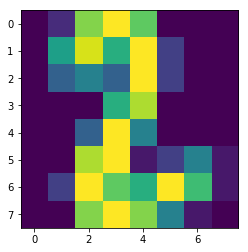

In [23]:
plt.imshow(images[0].reshape(8, 8))

**Задание 1. (1 балл)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): 
* Подберите число кластеров для некоторой фиксированной метрики из указанных выше. 
* Рассмотрите различные способы выбора начального приближения (параметр *init*). 
* Оцените качество получившейся кластеризации используя все описанные выше метрики. 
* Визуализируйте изображения, соответствующие центроидам лучшей кластеризации. 
* Визуализируйте несколько изображений, которые во всех случаях были отнесены к неправильному кластеру (объект назовем ошибочно отнесенным, если он имеет иную метку класса, нежели большая часть объектов в кластере). Можете ли вы пояснить почему так произошло?

В качестве начального приближения для центров кластеров возьмем random и k-means++. Пытаться подобрать эти центры руками кажется глупым.

In [32]:
best_score = 0
for n in range(2, 20):
    for init in ['random', 'k-means++']:
        kmeans = KMeans(n_clusters=n, init=init)
        kmeans.fit(images)
        pred_targets = kmeans.labels_
        score = adjusted_rand_score(targets, pred_targets)
        print('count clusters = {}, init = {}, Adjusted Rand index = {}'.format(n, init, score))
        
        if score > best_score:
            best_score = score
            best_params = (n, init)
           
    
print('\n best score = {}, best params = {}'.format(best_score, best_params))

count clusters = 2, init = random, Adjusted Rand index = 0.13805102113441284
count clusters = 2, init = k-means++, Adjusted Rand index = 0.13805102113441284
count clusters = 3, init = random, Adjusted Rand index = 0.2217899271003606
count clusters = 3, init = k-means++, Adjusted Rand index = 0.22111379611667503
count clusters = 4, init = random, Adjusted Rand index = 0.2858248591202458
count clusters = 4, init = k-means++, Adjusted Rand index = 0.2885220348246109
count clusters = 5, init = random, Adjusted Rand index = 0.3890612939572464
count clusters = 5, init = k-means++, Adjusted Rand index = 0.35863219188865475
count clusters = 6, init = random, Adjusted Rand index = 0.4318724453190384
count clusters = 6, init = k-means++, Adjusted Rand index = 0.428831987035458
count clusters = 7, init = random, Adjusted Rand index = 0.467729603452672
count clusters = 7, init = k-means++, Adjusted Rand index = 0.47457816838518085
count clusters = 8, init = random, Adjusted Rand index = 0.55850893

Отлично, как и ожидалось наилучшее число кластеров примерно равно кол-ву классов (10).

In [33]:
kmeans = KMeans(n_clusters=11, init='k-means++')
kmeans.fit(images)
pred_targets = kmeans.labels_

print('Homogeneity = {}, Completeness = {}'.format(homogeneity_score(targets, pred_targets), 
                                                   completeness_score(targets, pred_targets)))
print('Adjusted Rand index = {}'.format(adjusted_rand_score(targets, pred_targets)))
print('Silhouette Coefficient = {}'.format(silhouette_score(images, targets)))


Homogeneity = 0.7851772031086915, Completeness = 0.7594727107031413
Adjusted Rand index = 0.7227051736007598
Silhouette Coefficient = 0.16294320522575226


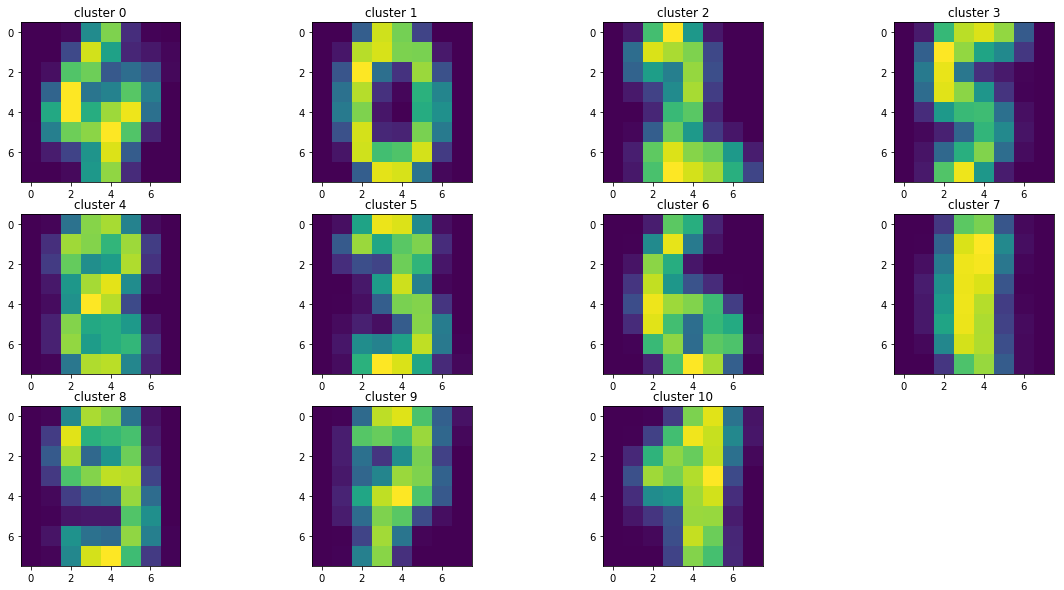

In [38]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(20, 10))
for i in range(11):
    plt.subplot(3, 4, i + 1)
    plt.imshow(centers[i].reshape(8, 8))
    plt.title('cluster ' + str(i))

Видим, что центры класеров сильно похожи на цифры, которые этим кластерам соответствуют. Здесь можно заметить все цифры и еще какую-то палку в кластере номер 7 (возможно это другая запись единицы).

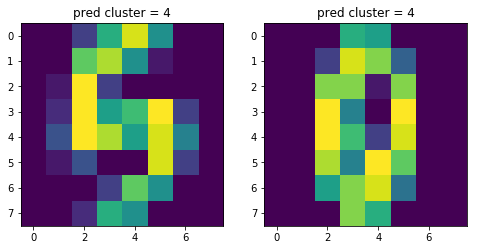

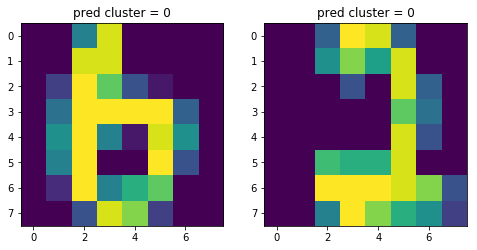

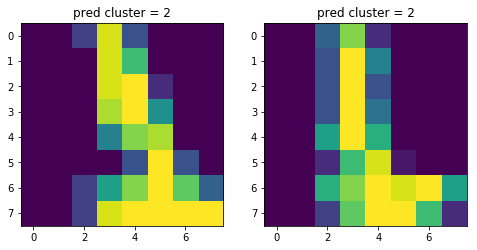

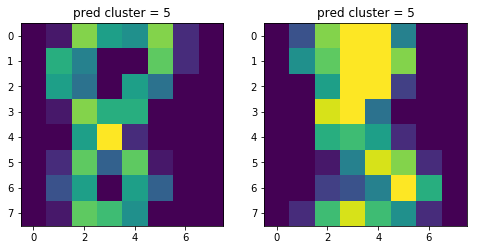

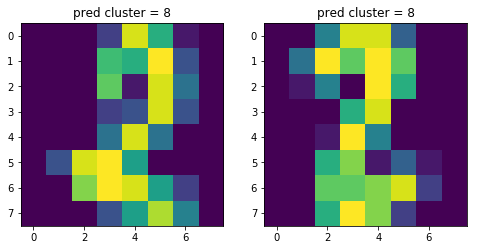

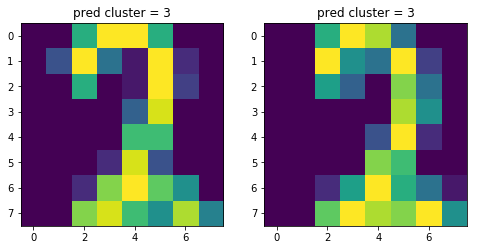

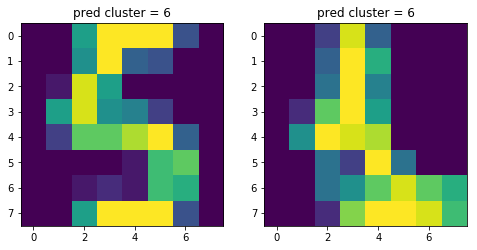

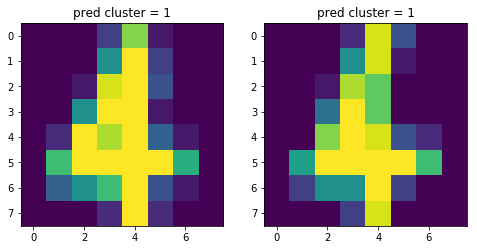

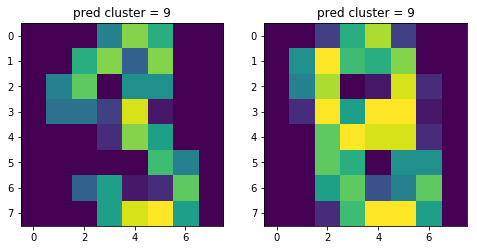

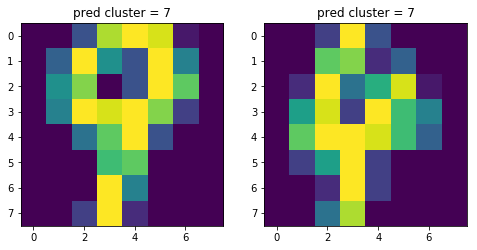

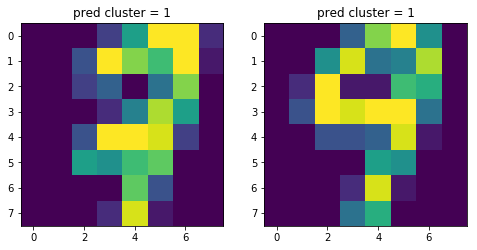

In [62]:
bad_images = []
for i in range(11):
    cluster_images = np.where(pred_targets == i)[0]
    true_targets = targets[cluster_images]
    unique, counts = np.unique(true_targets, return_counts=True)
    common_target = unique[np.argmax(counts)]
    bad_inds = np.where(true_targets != common_target)[0]
    
    plt.figure(figsize = (8, 6))
    for i, img in enumerate(cluster_images[bad_inds][:2]):
        plt.subplot(1, 2, i + 1)
        plt.imshow(images[img].reshape(8, 8))
        plt.title('pred cluster = {}'.format(common_target))
    plt.show()


Первые 3 метрики, кажется, достаточно хорошие. Вот последняя (Silhouette Coefficient) не очень. Это означает, что расстояния между объектами в одном кластере и расстояние между объектами соседних кластеров не сильно отличается. Это, конечно, плохо, однако тут хочется больше доверять первым трем метрикам, так как они посчитаны с учетов истинных меток.

Не всегда бывает удобно работать с полной матрицей объект-признак, например, для случая визуализации данных. В одной из предыдущих лабораторных работ был рассмотрен метод уменьшения размерности *PCA*. Вот [здесь](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py) было показано сравнение различных способов сжатия размерности для проекции на плоскость. На изображениях видно, что некоторые преобразования дают неплохую картину и похожие объекты расположены близко друг к другу. Посмотрим, поможет ли это на практике.
 
**Задание 2. (2.5 балла)** Примените преобразования [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [tSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (для числа компонент 2), после чего подайте полученные представления объектов на вход алгоритмам KMeans, [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) и [Birch](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html). 
* Сравните новые и предыдущие результаты. 
* Нашлась ли пара "представление"—"алгоритм", превосходящая другие по всем метрикам? 
* Являются ли все три метрики согласованными? Можете ли вы объяснить почему?

Просто так сравнить кажется слишком простым, а стоит 2.5 балла. Наверно нужно сделать что-то еще. Будем для каждой конфинурации подбирать оптимальные параметры.

In [111]:
from itertools import product

In [159]:
def find_best_params(algorithm, data, targets, **params):
    names_param = list(params.keys())
    prod_params = product(*list(params.values()))
    best_score = 0
    for param in prod_params:
        param = list(param)
        if names_param[0] == 'n_clusters':
            param[0] = int(param[0])

        alg = algorithm(**dict(zip(names_param, param)))
        alg.fit(data)
        pred_targets = alg.labels_
        score = adjusted_rand_score(targets, pred_targets)
        if score > best_score:
            best_score = score
            best_params = dict(zip(names_param, param))
            
    return best_params

In [70]:
from sklearn.cluster import DBSCAN, Birch
from sklearn.manifold import TSNE

Теперь для каждой кофигурации найдем лучшее парметры. Для лучших парметров построим модель инайдем значения метрик, а также изобразим класеризацию на графиках.

------- PCA & KMeans --------
best params : {'n_clusters': 10, 'init': 'k-means++'}
Homogeneity = 0.5239211840164312, Completeness = 0.5274081223348376
Adjusted Rand index = 0.38887064395189114
Silhouette Coefficient = 0.16294320522575226


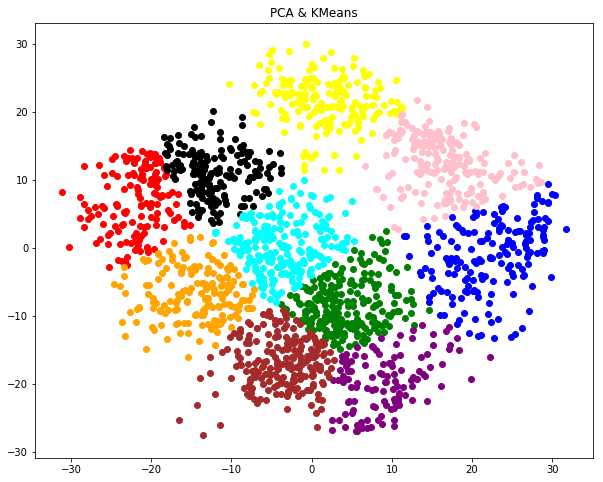

------- PCA & DBSCAN --------
best params : {'eps': 3.0, 'min_samples': 25}
Homogeneity = 0.31760918096449564, Completeness = 0.568228023875606
Adjusted Rand index = 0.14303831576400697
Silhouette Coefficient = 0.16294320522575226


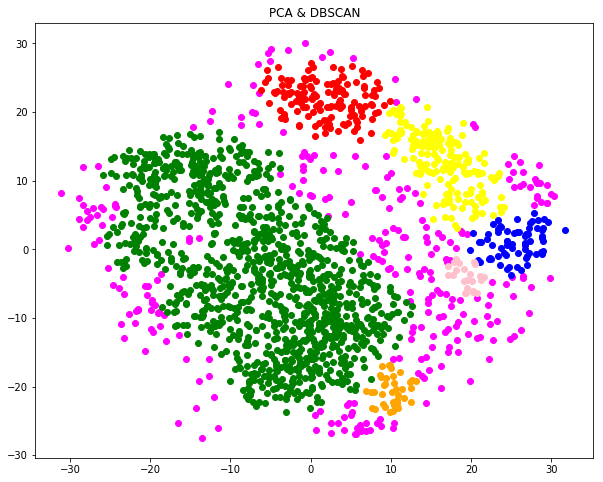

------- PCA & Birch --------
best params : {'n_clusters': 10, 'threshold': 0.1, 'branching_factor': 30}
Homogeneity = 0.5240664774932933, Completeness = 0.5401330855253175
Adjusted Rand index = 0.3976669112151464
Silhouette Coefficient = 0.16294320522575226


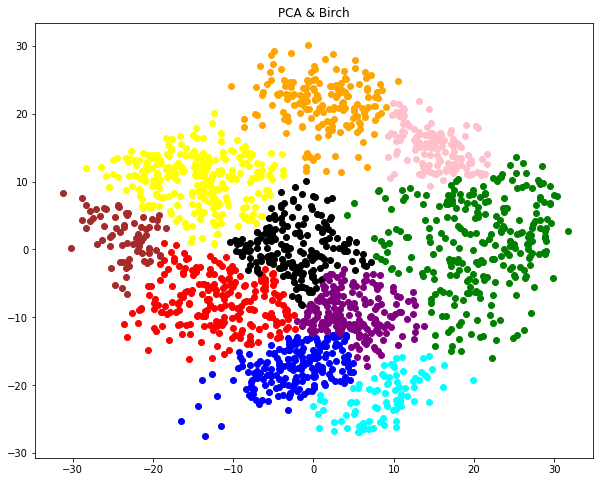

------- TSNE & KMeans --------
best params : {'n_clusters': 12, 'init': 'k-means++'}
Homogeneity = 0.9360377504621857, Completeness = 0.885279564831373
Adjusted Rand index = 0.88399653642479
Silhouette Coefficient = 0.16294320522575226


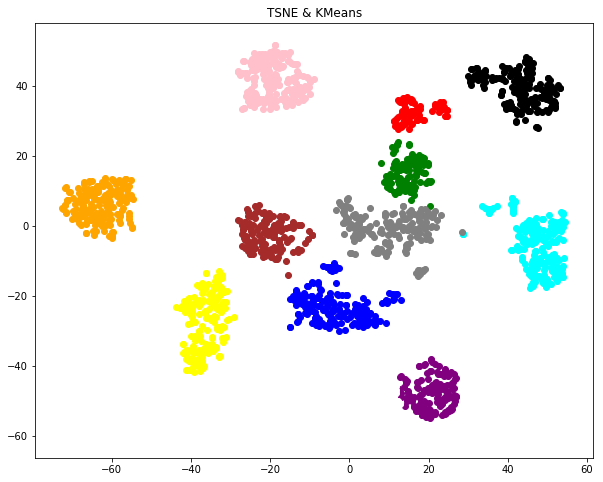

------- TSNE & DBSCAN --------
best params : {'eps': 5.0, 'min_samples': 20}
Homogeneity = 0.9162020717525798, Completeness = 0.901365086179756
Adjusted Rand index = 0.8579994151236402
Silhouette Coefficient = 0.16294320522575226


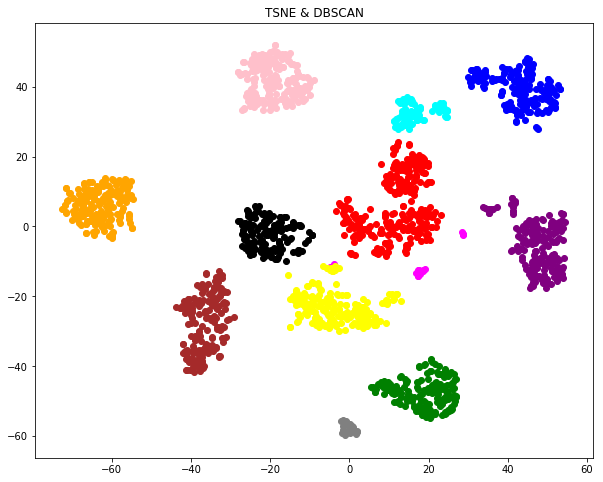

------- TSNE & Birch --------
best params : {'n_clusters': 11, 'threshold': 1.3000000000000003, 'branching_factor': 10}
Homogeneity = 0.9435496073793718, Completeness = 0.9271875318793691
Adjusted Rand index = 0.9184010632912447
Silhouette Coefficient = 0.16294320522575226


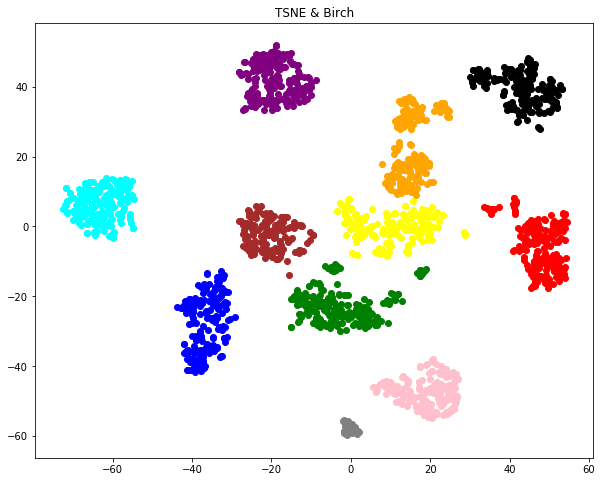

In [188]:
algorithms = [KMeans, DBSCAN, Birch]
alg_names = ['KMeans', 'DBSCAN', 'Birch']
some_colors = ['green', 'yellow', 'red', 'blue', 'orange', 'pink', 'black', 'purple', 'brown', 'cyan', 'gray', 'white', 'magenta']

kwargs = [{'n_clusters' : np.arange(3, 14), 'init': ['random', 'k-means++']},
          {'eps' : np.arange(3, 10, 0.5), 'min_samples' : np.arange(5, 35, 5)},
          {'n_clusters' : list(np.arange(3, 14)), 'threshold' : np.arange(0.1, 1.6, 0.2), 'branching_factor' : np.arange(10, 110, 10)}]

for transformation, trans_name in zip([PCA, TSNE], ['PCA', 'TSNE']):
    
    transform = transformation(n_components=2)
    transform_images = transform.fit_transform(images)

    for algorithm, kwarg, alg_name in zip(algorithms, kwargs, alg_names):
        if alg_name == 'DBSCAN' and trans_name == 'TSNE':
            kwarg = {'eps' : np.arange(5, 10, 0.5), 'min_samples' : np.arange(5, 35, 5)}
        
        params = find_best_params(algorithm, transform_images, targets, **kwarg)
        print('------- {} & {} --------'.format(trans_name, alg_name))
        print('best params : {}'.format(params))
        method = algorithm(**params)
        method.fit(transform_images)
        pred_targets = method.labels_
        
        print('Homogeneity = {}, Completeness = {}'.format(homogeneity_score(targets, pred_targets), 
                                                   completeness_score(targets, pred_targets)))
        print('Adjusted Rand index = {}'.format(adjusted_rand_score(targets, pred_targets)))
        print('Silhouette Coefficient = {}'.format(silhouette_score(images, targets)))
        
        plt.figure(figsize=(10, 8))
        for t in np.unique(pred_targets):
            cluster_inds = pred_targets == t
            plt.scatter(transform_images[cluster_inds][:,0], transform_images[cluster_inds][:,1], color=some_colors[t])
        plt.title(trans_name + ' & ' + alg_name)
        plt.show()

Видим во-первых, что визуализация получилась лучше при t-SNE. Собственно, именно поэтому t-SNE часто и используется для визуализации. При применении PCA визуально лучше работают kmeans и birch так как видно четкое разделение на кластеры, что в случае DBSCAN не так. Кроме того, можно заметить, что Birch и Kmeans привели к примерно одинаковой кластеризации на PCA. Если посмотреть на T-SNE, то в силу того, что данные хорошо отделяются, то все методы сработали визульно хорошо и разделили данные примерно одинаково. Также можно заметить, что первые 3 метрики (которые считаются с учетом правильных ответов) сильно возрасли при использовании T-SNE. Самые хорошие метрики получились при использовании TSNE & Birch.


**Задание 3. (0.5 балла)** Ответьте на следующие вопросы:
* В чём преимущества и недостаки каждого из рассмотренных алгоритмов кластеризации? Ответ обоснуйте.
* Приведите примеры данных, для которых использование каждого из алгоритмов будет наиболее обосновано с точки зрения качества и/или производительности? В этом задании будет достаточно описать какими должны быть данные, приводить примеры конкретных датасетов не нужно.

У DBSCAN основным преимуществом кажется то, что мы не привязаны к определенному кол-ву кластеров. Мы можем построить всю иерархическую кластеризацию, посмотреть на дендрограмму и потом решить, где же лучше отрезать и тем самым выбрать "оптимальное" для нас кол-во кластеров.
Также DBSCAN может находить кластеры произвольной формы, которые даже могут быть невыпуклыми. Однако, как было замечено, этот алгоритм очень чувствителен к изменению гиперпараметров eps и min_samples и в зависимости от них кластеризация может получиться совершенно разной. Также, мо графикам и по разным картинкам в интернете можно заметить, что немного сливающиеся кластеры определяются как один кластер.

Минусами Kmeans и Birch является то, что они находят кластеры в основном выпуклые и примерно одинаковой формы (примерно шаровидной), то есть на каких-нибудь вытянутых линиях они будут работать плохо. 

Ну собственно, я уже вроде сказала на каких датасетах это лучше применять.
Если у нас много выбросов, то DBSCAN (он их умеет обрабатывать - это шумовые объекты). Если мы хотим (или посмотрев на данные поняли, что должны быть примерно такие) получить сложные кластеры (неравные и невыпуклой формы), то тоже DBSCAN. Если же кластеры примерно похожие по размерам и выпуклые, то Kmeans.

## Частичное обучение

![](https://i.imgur.com/C6HjiXq.png)

Качество unsupervised методов можно существенно улучшить, зная правильные ответы хотя бы для небольшой части выборки. Методы такого рода называются _частичным обучением (semi-supervised learning)_. Более подробно про реализацию таких методов в sklearn можно прочитать в разделе [semi-supervised](http://scikit-learn.org/stable/modules/label_propagation.html#semi-supervised).

Загрузите датасет [Wine](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) и создайте из него выборку, где для каждого класса имеется по одному объекту с известным ответом, а ответы на остальных объектах равны -1. 

In [191]:
from sklearn.datasets import load_wine
wine_data = load_wine()
data, targets = wine_data.data, wine_data.target

In [193]:
semi_targets = -np.ones(len(targets))
semi_targets[np.where(targets==0)[0][0]] = 0
semi_targets[np.where(targets==1)[0][0]] = 1
semi_targets[np.where(targets==2)[0][0]] = 2

**Задание 4. (1 балл)** Обучите [LabelSpreading](http://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html) на этих данных, рассмотрев различные значения параметра **kernel** (*knn*, *rbf*). Посчитайте качество полученной разметки для каждого класса (в качестве метрик используйте точность и полноту). 

In [200]:
from sklearn.metrics import precision_score, recall_score
from sklearn.semi_supervised import LabelSpreading

for kernel in ['knn', 'rbf']:
    clf = LabelSpreading(kernel=kernel)
    clf.fit(data, semi_targets)
    preds = clf.predict(data)
    
    print('-- kernel = {} --\n precision = {}, recall = {}'.format(kernel, precision_score(preds, targets, average=None), 
                                                           recall_score(preds, targets, average=None)))


-- kernel = knn --
 precision = [1.         0.23943662 0.22916667], recall = [0.45384615 0.5483871  0.64705882]
-- kernel = rbf --
 precision = [1. 0. 0.], recall = [0.33146067 0.         0.        ]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


При использовании ядра knn результаты, конечно, явно лучше. Хотя recall все еще не очень большой, да и точность для первого и второго классов не очень.

**Задание 5. (0.5 балла)** Отобразите объекты вместе с верными и предсказанными ответами на двумерном графике, использовав [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) с 2 компонентами. 

Будем рисовать результаты наилучшей модели, то есть с ядром knn. Но перед тем как что-либо рисовать давайте улучшим чуть-чуть качество. Для улучшения нам нужна какая-то одномерная метрика. Возьмем accuracy, она в принципе коррелирует с метриками, которые мы хотим улучшать.

In [14]:
import warnings
warnings.simplefilter('ignore')

In [213]:
from sklearn.metrics import f1_score, accuracy_score
best_score = 0

for n in np.arange(5, 40, 2):
    clf = LabelSpreading(kernel='knn', n_neighbors=n)
    clf.fit(data, semi_targets)
    preds = clf.predict(data)
    
    score = accuracy_score(preds, targets)
    if score > best_score:
        best_score = score
        best_param = n
        best_preds = preds
    

print('best n_neighbors = {}\naccuracy = {}, \nprecision = {}, \nrecall = {}'.format(best_param, best_score,
                                                                           precision_score(best_preds, targets, average=None), 
                                                                           recall_score(best_preds, targets, average=None)))

best n_neighbors = 21
accuracy = 0.7247191011235955, 
precision = [0.91525424 0.69014085 0.54166667], 
recall = [0.85714286 0.74242424 0.53061224]


Качество сильно улучшилось. Теперь рисуем.

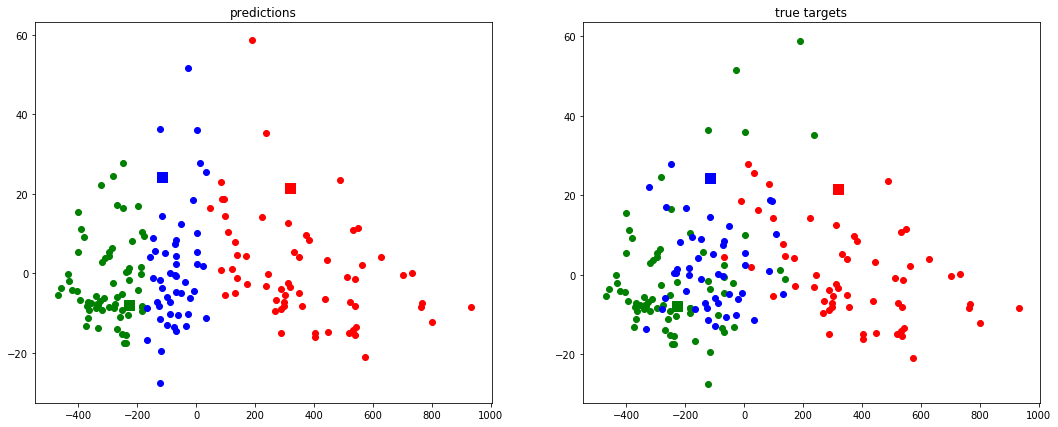

In [235]:
some_colors = ['red', 'green', 'blue']

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
for t in np.unique(best_preds):

    cluster_inds = best_preds == t
    
    plt.scatter(pca_data[cluster_inds][:,0], pca_data[cluster_inds][:,1], color=some_colors[int(t)])
    
plt.scatter(pca_data[semi_targets==0][:,0], pca_data[semi_targets==0][:,1], c='r', marker='s', s=120)
plt.scatter(pca_data[semi_targets==1][:,0], pca_data[semi_targets==1][:,1], c='g', marker='s', s=120)
plt.scatter(pca_data[semi_targets==2][:,0], pca_data[semi_targets==2][:,1], c='b', marker='s', s=120)
plt.title('predictions')

plt.subplot(1, 2, 2)
for t in np.unique(targets):

    cluster_inds = targets == t
    
    plt.scatter(pca_data[cluster_inds][:,0], pca_data[cluster_inds][:,1], color=some_colors[int(t)])
    
    
plt.scatter(pca_data[semi_targets==0][:,0], pca_data[semi_targets==0][:,1], c='r', marker='s', s=120)
plt.scatter(pca_data[semi_targets==1][:,0], pca_data[semi_targets==1][:,1], c='g', marker='s', s=120)
plt.scatter(pca_data[semi_targets==2][:,0], pca_data[semi_targets==2][:,1], c='b', marker='s', s=120)
plt.title('true targets')
    
plt.show()

Квадратики - это те точки, которые мы взяли за опорные. Видно, что точки можно было бы выбрать и получше. Например, если бы точки лежали в середине классов, то кажется, результат был бы лучше. Но несмотря на это, результат визуально выглядит достаточно неплохо. Кроме того, немного подобрав параметры мы получили достаточно хорошие значения точности и полноты.

**Задание 6. (0.5 балла)** Попробуйте запустить алгоритм несколько раз, отмечая известными различные объекты, посчитайте качество и визуализируйте результаты. Можно ли сказать что алгоритм сильно зависит от известных начальных объектов? Есть ли класс, для которого это больше всего заметно?

Здесь уже параметры подбирать не будем, чтобы оценивать именно влияние выбора опорных элементов.


precision = [0.98305085 0.30985915 0.72916667], 
recall = [0.74358974 0.91666667 0.46052632]


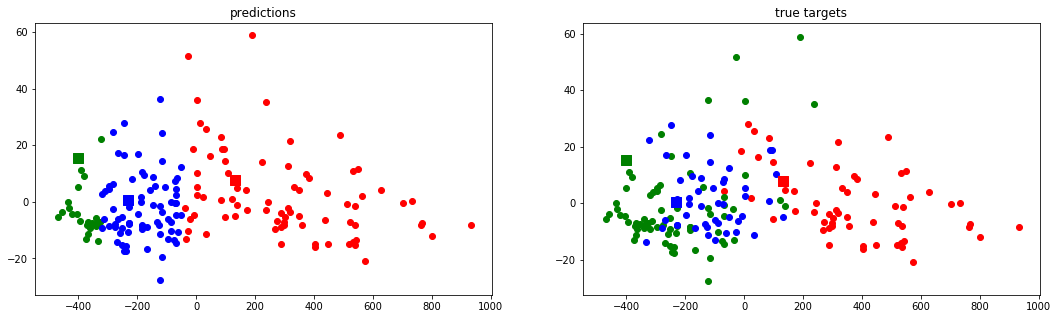

-----------------------------------------

precision = [0.98305085 0.33802817 0.72916667], 
recall = [0.75324675 0.92307692 0.46666667]


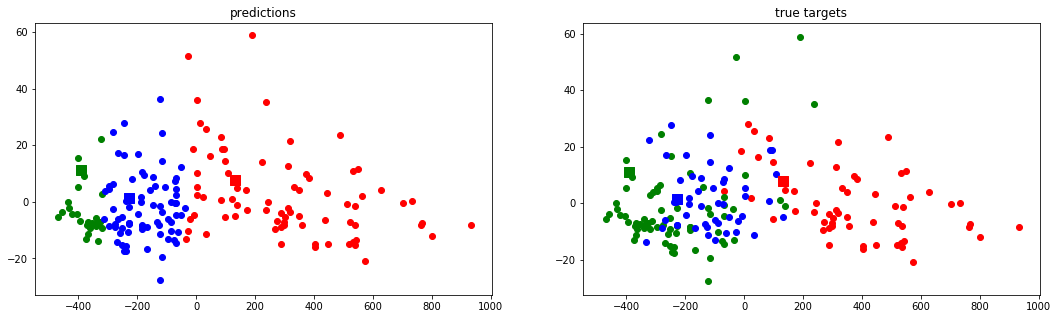

-----------------------------------------

precision = [0.84745763 0.36619718 0.9375    ], 
recall = [0.92592593 0.92857143 0.46875   ]


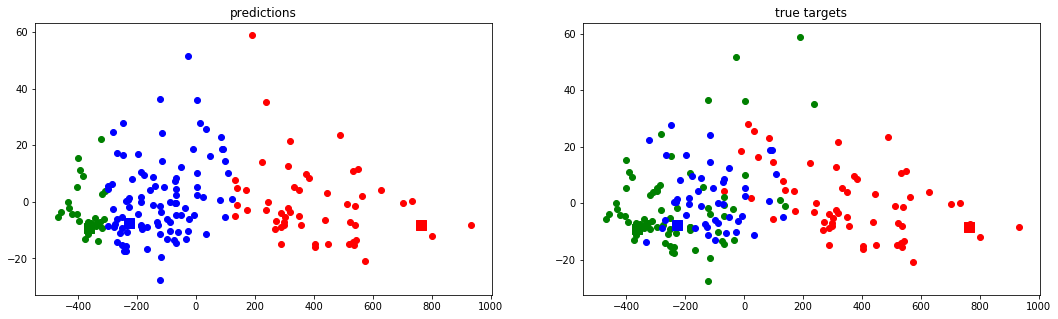

-----------------------------------------

precision = [0.83050847 0.36619718 0.95833333], 
recall = [0.94230769 0.92857143 0.46938776]


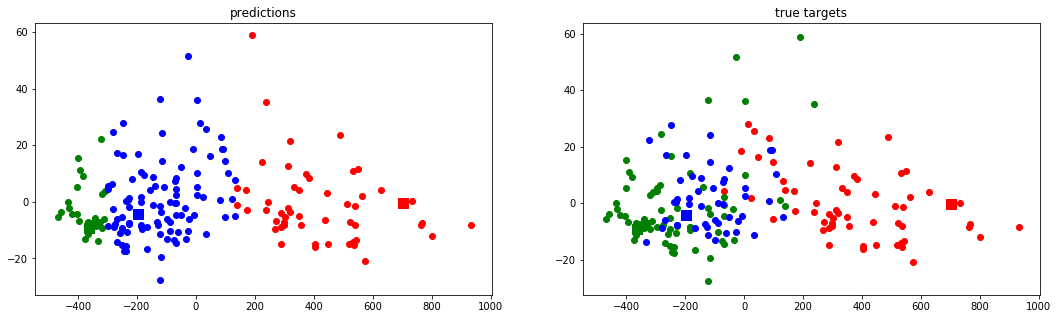

-----------------------------------------

precision = [0.89830508 0.63380282 0.6875    ], 
recall = [0.85483871 0.81818182 0.54098361]


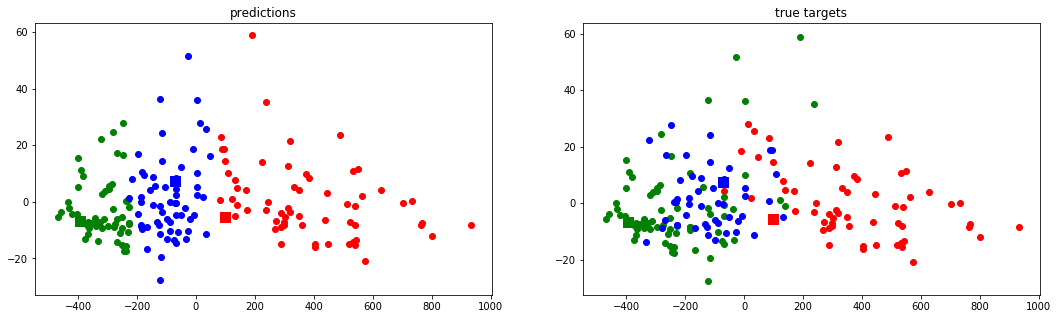

-----------------------------------------

precision = [0.84745763 0.14084507 0.64583333], 
recall = [0.90909091 0.28571429 0.35227273]


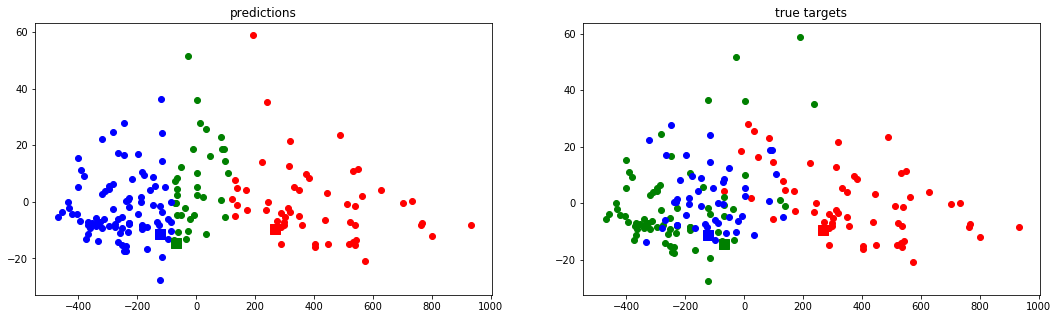

-----------------------------------------

precision = [0.11864407 0.08450704 0.8125    ], 
recall = [1.         0.09090909 0.37142857]


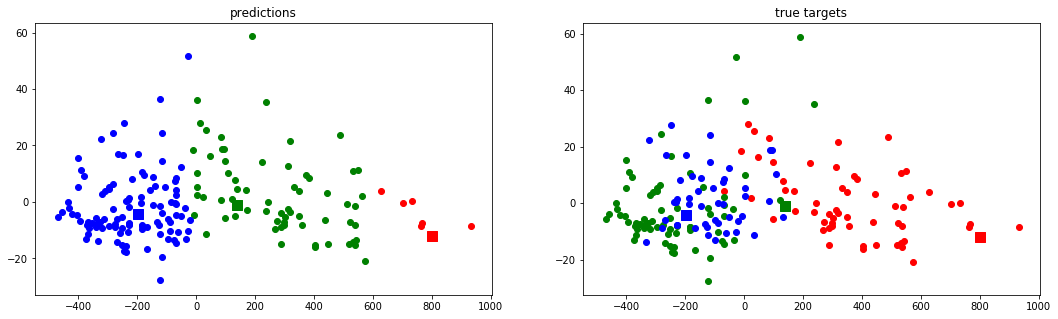

-----------------------------------------

precision = [0.72881356 0.04225352 0.89583333], 
recall = [0.51807229 0.33333333 0.5       ]


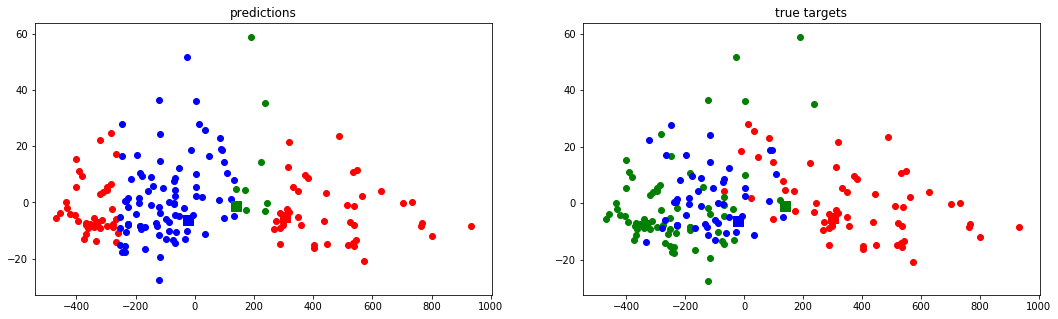

-----------------------------------------

precision = [0.77966102 0.78873239 0.45833333], 
recall = [0.95833333 0.68292683 0.45833333]


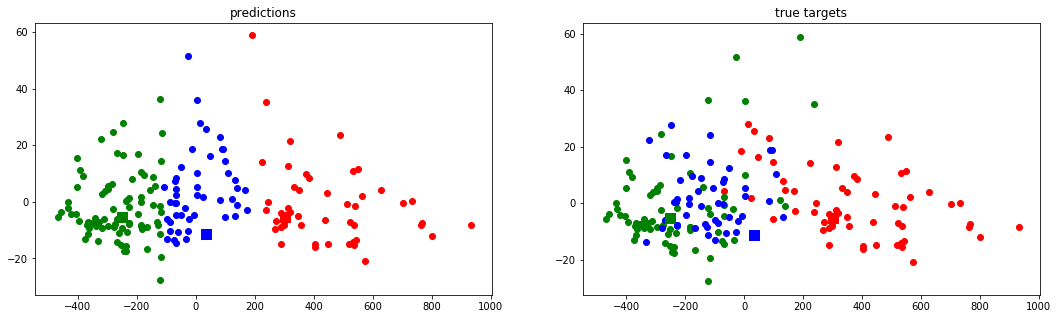

-----------------------------------------

precision = [0.81355932 0.63380282 0.75      ], 
recall = [0.96       0.78947368 0.50704225]


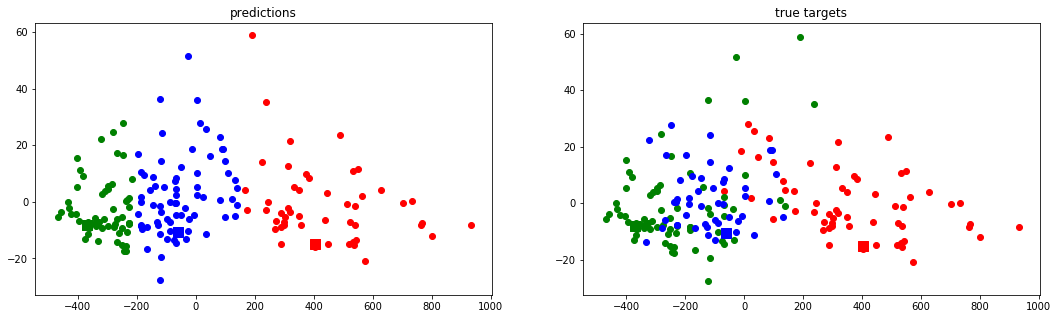

-----------------------------------------


In [242]:
n_neighbors = 21
kernel = 'knn'

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

zero_class = np.where(targets==0)[0]
one_class = np.where(targets==1)[0]
two_class = np.where(targets==2)[0]
for _ in range(10):
    
    semi_targets = -np.ones(len(targets))
    zero_supporting = np.random.choice(zero_class)
    one_supporting = np.random.choice(one_class)
    two_supporting = np.random.choice(two_class)
    
    semi_targets[zero_supporting] = 0
    semi_targets[one_supporting] = 1
    semi_targets[two_supporting] = 2
    
    clf = LabelSpreading(kernel='knn', n_neighbors=n)
    clf.fit(data, semi_targets)
    preds = clf.predict(data)
    
    
    print('\nprecision = {}, \nrecall = {}'.format(precision_score(preds, targets, average=None), 
                                                    recall_score(preds, targets, average=None)))
    
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 2, 1)
    for t in np.unique(preds):

        cluster_inds = preds == t
        plt.scatter(pca_data[cluster_inds][:,0], pca_data[cluster_inds][:,1], color=some_colors[int(t)])
    
    plt.scatter(pca_data[semi_targets==0][:,0], pca_data[semi_targets==0][:,1], c='r', marker='s', s=120)
    plt.scatter(pca_data[semi_targets==1][:,0], pca_data[semi_targets==1][:,1], c='g', marker='s', s=120)
    plt.scatter(pca_data[semi_targets==2][:,0], pca_data[semi_targets==2][:,1], c='b', marker='s', s=120)
    plt.title('predictions')
    
    plt.subplot(1, 2, 2)
    for t in np.unique(targets):
        cluster_inds = targets == t
        plt.scatter(pca_data[cluster_inds][:,0], pca_data[cluster_inds][:,1], color=some_colors[int(t)])

    
    plt.scatter(pca_data[semi_targets==0][:,0], pca_data[semi_targets==0][:,1], c='r', marker='s', s=120)
    plt.scatter(pca_data[semi_targets==1][:,0], pca_data[semi_targets==1][:,1], c='g', marker='s', s=120)
    plt.scatter(pca_data[semi_targets==2][:,0], pca_data[semi_targets==2][:,1], c='b', marker='s', s=120)
    plt.title('true targets')
    plt.show()
    
    print('-----------------------------------------')

Видим, что в зависимости от выбора опорных элементов мы получаем совсем разные результаты. Это видно и по сильно изменяющимся метрикам полноты и точности, и по картинкам. В зависимости от опорных элементов наши кластеры могут не только изменять форму, но меняться местами.

Сильней всего метрики меняются для синего и зеленого классов (это класс 1 и класс 2) так как они частично перемешаны между собой, что можно заметить по картинке с истинными значениями таргета. Красный же класс более менее отделен от остальных и кластеризация для него проходит более независимо от выбора опорного элемента.

## Тематическое моделирование

![](http://imgur.com/S8WgwBp.png)

Тематическое моделирование является популярным инструментом анализа текстов. Задача заключается в поиске тем $T$, которые хорошо бы описывали документы $D$ со словарём $W$. Большинство тематических моделей оперирует данными в формате "мешка слов", т.е. учитывают только частоты слов в документах, а не их порядок. Одной из простейших тематических моделей является [PLSA](https://en.wikipedia.org/wiki/Probabilistic_latent_semantic_analysis), которая приводит к задаче стохастического матричного разложения: 

$$F \approx \Phi \times \Theta$$
где
- $F_{W \times D}$— матрица распределений слов в документах (нормированные частоты)
- $\Phi_{W \times T}$ — матрица распределений слов в темах (модель)
- $\Theta_{T \times D}$ — матрица распределений тем в документах (результат применения модели к обучающим данным)

Можно сказать, что алгоритмы тематического моделирования производят мягкую бикластеризацию данных:
 - *мягкую*, так как объекты относятся не строго к одному кластеру, а к нескольким с разными вероятностями
 - *бикластеризацию*, так как модель одновременно кластеризует слова по темам и темы по документам.

### EM-алгоритм

![](http://imgur.com/EeIuI1T.png)

С вероятностной точки зрения, задача обучения модели PLSA ставится как максимизация неполного правдоподобия по параметам $\Phi$ и $\Theta$. ЕМ-алгоритм для модели PLSA заключается в повторении двух шагов:

- **Е-шаг** — оценка распределений тем для каждого слова в каждом документе по параметрам $\Phi$ и $\Theta$ (шаг 6);
- **М-шаг** — обновление параметров $\Phi$ и $\Theta$ на основе полученных оценок (шаги 7 и 9).

Существуют различные модификации итерационного процесса, позволяющие снизить расходы по памяти. В данном случае, мы избежим хранения трехмерной матрицы $p_{tdw}$, сразу пересчитывая $\Theta$ для текущего документа и аккумулируя счетчики $n_{wt}$ для последующего пересчета $\Phi$.

Псевдокод алгоритма записывается следующим образом:

1. Инициализировать $\phi_{wt}^0$ для всех $w \in W$, $t \in T$ и $\theta_{td}^0$ для всех $t \in T$, $d \in D$
2. Внешний цикл по итерациям $i = 1 ... max\_iter$:
3. $\quad$ $n_{wt}^i := 0$, $n_t^i := 0$ для всех $w \in W$ и $t \in T$ 
4. $\quad$ Внутренний цикл по документам $d \in D$  
5. $\qquad$ $Z_w := \sum_{t \in T} \phi_{wt}^{i-1}\theta_{td}^{i-1}$ для всех $w \in d$ $\cfrac{}{}$
6. $\qquad$ $p_{tdw} := \cfrac{ \phi_{wt}^{i-1}\theta_{td}^{i-1} }{ Z_w }$ (**E-шаг**)
7. $\qquad$ $\theta_{td}^{i} := \cfrac{ \sum_{w \in d} n_{dw} p_{tdw} }{ n_d }$ для всех $t \in T$ (**M-шаг**)
8. $\qquad$ Увеличить $n_{wt}^i$ и $n_t^i$ на $n_{dw} p_{tdw}$ для всех $w \in W$ и $t \in T$
9. $\quad \phi_{wt}^i := \cfrac{n_{wt}^i}{n_t^i}$ для всех $w \in W$ и $t \in T$ (**M-шаг**)

Обозначения:
 - $p_{tdw}$ — вероятность темы $t$ для слова $w$ в документе $d$
 - $\phi_{wt}$ — элемент матрицы $\Phi$, соответствующий вероятности слова $w$ в теме $t$
 - $\theta_{td}$ — элемент матрицы $\Theta$, соответствующий вероятности темы $t$ в документе $d$
 - $n_{wt}$ — элемент матрицы счётчиков отнесения слова $w$ к теме $t$ (путем нормирования этой матрицы получается матрица $\Phi$)
 - $Z_w$ — элемент вектора вспомогательных переменных, соответствующий слову $w$
 - $n_t$ — вектор нормировочных констант для матрицы $n_{wt}$
 - $n_d$ — вектор нормировочных констант для матрицы $n_{dw}$
 - $n$ — суммарное число слов в коллекции
 
###  Оценка качества

Для оценивания качества построенной модели и контроля сходимости процесса обучения обычно используют [перплексию](http://www.machinelearning.ru/wiki/images/8/88/Voron-iip9-talk.pdf):

$$\mathcal{P} = \exp\bigg(- \frac{\mathcal{L}}{n} \bigg) = \exp\bigg(- \cfrac{1}{n}\sum_{d \in D}\sum_{w \in d} n_{dw} \ln \big(\sum_{t \in T}\phi_{wt}\theta_{td} \big)\bigg)$$

Это традиционная мера качества в тематическом моделировании, которая основана на правдоподобии модели $\mathcal{L}$. Число итераций $max\_iter$ в алгоритме обучения следует выбирать достаточным для того, чтобы перплексия перестала существенно убывать. Однако известно, что перплексия плохо отражает интерпретируемость найденных тем, поэтому помимо нее обычно используются дополнительные меры или экспертные оценки.

### Рекомендации к реализации
- При делении на нулевые значения нужно просто заменить частное на ноль.
- ЕМ-алгоритм стоит реализовывать с использованием векторных операций. Для проверки корректности реализации сперва можно написать скалярную версию, после чего векторизовать её, удостоверившись, что обе реализации дают одинаковый результат. Невекторизованный алгоритм может работать в сотни раз медленнее векторизованного, и его использование может привести к невозможности выполнения задания.
- Итерационный процесс следует начинать, инициализировав матрицы $\Phi$ и $\Theta$. Инициализация может быть случайной, важно не забыть отнормировать столбцы матриц.
- Неэффективная реализация перплексии может в разы замедлить работу алгоритма.

Загрузите [коллекцию писем Х. Клинтон](https://yadi.sk/d/-Ci15wecokdxzQ) (коллекцию можно скачать прямо с сайта [kaggle.com](https://www.kaggle.com/kaggle/hillary-clinton-emails)). 

Извлеките полные тексты писем из файла *Emails.csv* и подготовьте данные в формате "мешка слов" с помощью функции  [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) пакета sklearn. Рекомендуется произвести фильтрацию слов по частотности для удаления слишком редких и стоп-слов (рекомендованный нижний порог в пределах 10 и верхний 400-600).

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data_emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
data_emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


Я так понимаю, что нас интересует только колонка ExtractedBodyText с текстом сообщения, так как RawText содержит еще кучу мета-информации, слова которой мы не можем использовать в мешке слов - они могут не нести смысловой информации, да и вообще это не слова в их обычном понимании. Заметим, что столбец ExtractedBodyText содержит пропуски, уберем их.

In [4]:
data = data_emails.ExtractedBodyText
indeces_consider = np.where(np.array(pd.isna(data)) == False)[0]
data = np.array(data)[indeces_consider]

У CountVectorizer есть параметры, позволяющие регулировать максимальную и минимальную частоту или кол-во слов, которые мы будем рассматривать в словаре. Поэтому фильтрацию за нас сделает тоже CountVectorizer.

In [5]:
vectorizer = CountVectorizer(max_df=500, min_df=10)
vectorize_data = vectorizer.fit_transform(data)
vectorize_data = vectorize_data.toarray()

**Задание 7. (4 балла)** Реализуйте описанный выше ЕМ-алгоритм для модели $PLSA$ и добавьте в вашу реализацию подсчёт перплексии. Примените ваш алгоритм к подготовленным данным, рассмотрев число тем T = 5. 
* Постройте график значения перплексии в зависимости от итерации (убедитесь в корректности реализации: график перплексии должен быть невозрастающим). 
* Выведите для каждой темы топ-20 наиболее вероятных слов. 

In [386]:
class PLSA:
    def __init__(self, F, count_topics, init_strategy='random', verbose=True):
        self.F = F
        self.count_topics = count_topics
        self.count_words = F.shape[0]
        self.count_docs = F.shape[1]
        self.verbose = verbose
        
        if init_strategy == 'random':
            self.Phi = np.random.random((self.count_words, self.count_topics))
            self.Theta = np.random.random((self.count_topics, self.count_docs))
        elif init_strategy == 'uniform':
            self.Phi = np.ones((self.count_words, self.count_topics))
            self.Theta = np.ones((self.count_topics, self.count_docs))
        
        # normalization
        self.Phi /= np.sum(self.Phi, axis=0)
        self.Theta /= np.sum(self.Theta, axis=0)
        self.perplexity = []
        
        
    def EM(self, count_iters):
        counts_in_docs = np.sum(self.F, axis=0)
        for i in range(count_iters):
            n_wt = np.zeros((self.count_words, self.count_topics))

            for d in range(self.count_docs):
                theta_td = self.Theta[:,d]
                n_dw = self.F[:, d]
                
                Z_w = np.sum(self.Phi * theta_td, axis=-1)
                
                p_tdw = self.Phi * theta_td / Z_w.reshape(-1, 1)
                p_tdw = np.nan_to_num(p_tdw)
                
                product_ndw_ptdw = p_tdw * n_dw.reshape(-1, 1)
                self.Theta[:, d] = np.nan_to_num(np.sum(product_ndw_ptdw, axis=0) / counts_in_docs[d])
                
                n_wt += product_ndw_ptdw
                
            n_t = np.sum(n_wt, axis=0)
            self.Phi = np.nan_to_num(n_wt / n_t)
            
            self.save_perplexity()
            if self.verbose:
                print('{} iteration, perplexity = {}'.format(i, self.perplexity[-1]))
            
            
    def compute_perplexity(self):
        perplexity = 0
        for d in range(self.count_docs):        
            log = np.log(np.sum(self.Phi * self.Theta[:, d], axis=-1))
            log = np.nan_to_num(log)
            perplexity += np.sum(self.F[:, d] * log)
        return np.exp(-perplexity / np.sum(self.F))
            
            
    def save_perplexity(self):
        perplexity = self.compute_perplexity()
        
        self.perplexity.append(perplexity)
        
    def draw_perplexity(self):
        plt.figure(figsize=(12, 7))
        plt.plot(np.arange(len(self.perplexity)), self.perplexity)
        plt.title('perplexity')
        plt.grid(ls=':')
        plt.show()
        
        
    def most_popular_words(self, count):
        return np.argsort(self.Phi, axis=0)[-count:][::-1]
        

In [374]:
plsa = PLSA(vectorize_data.T, count_topics=5)
plsa.EM(100)

0 iteration, perplexity = 1995.2522086812241
1 iteration, perplexity = 1969.9511289641493
2 iteration, perplexity = 1945.2166336257812
3 iteration, perplexity = 1915.534422952221
4 iteration, perplexity = 1876.733638152708
5 iteration, perplexity = 1827.7089651415777
6 iteration, perplexity = 1772.3668661242853
7 iteration, perplexity = 1717.0325516078726
8 iteration, perplexity = 1666.1126406340195
9 iteration, perplexity = 1620.9330790734589
10 iteration, perplexity = 1580.6986535901397
11 iteration, perplexity = 1544.972813816572
12 iteration, perplexity = 1513.7013779219703
13 iteration, perplexity = 1486.771084498923
14 iteration, perplexity = 1463.918266728781
15 iteration, perplexity = 1444.699189760157
16 iteration, perplexity = 1428.6025051751217
17 iteration, perplexity = 1415.245966262527
18 iteration, perplexity = 1404.2276903741727
19 iteration, perplexity = 1395.1204958219034
20 iteration, perplexity = 1387.616137457027
21 iteration, perplexity = 1381.4798772455479
22 ite

Посмотрим на график перплексии.

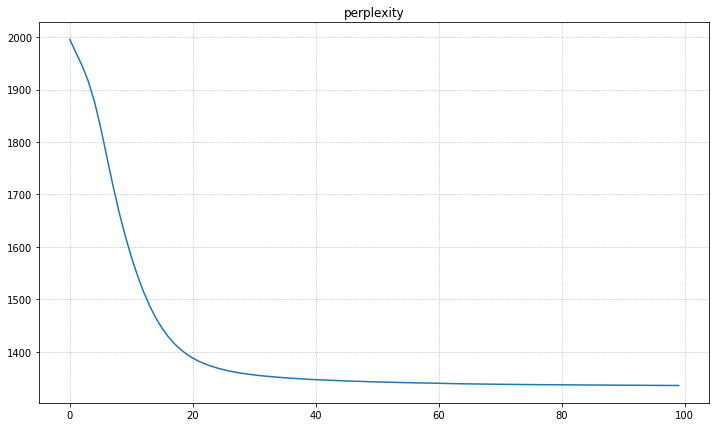

In [375]:
plsa.draw_perplexity()

Теперь для каждой темы посмотрим на топ 20 наиболее вероятных слов.

In [376]:
indeces_most_popular = plsa.most_popular_words(20)

In [384]:
words = np.array(vectorizer.get_feature_names())
for topic in range(indeces_most_popular.shape[1]):
    print('topic {}'.format(topic))
    print(words[indeces_most_popular[:,topic]][::-1])

topic 0
['b6' 'tomorrow' 'my' 'cheryl' 'today' 'ok' 'com' 'huma' 'him' 'fw' 'may'
 'mills' 'her' 'let' 'back' 'talk' 'pls' 'want' 'monday' 'clintonemail']
topic 1
['their' 'more' 'one' 'its' 'which' 'israel' 'his' 'us' 'been' 'how'
 'some' 'when' 'new' 'than' 'other' 'them' 'should' 'could' 'policy' 'who']
topic 2
['no' 'our' 'women' '2015' 'department' 'their' 'people' 'security'
 'information' 'case' 'benghazi' 'afghanistan' 'united' 'government'
 'agreement' 'date' 'work' 'subject' 'house' 'states']
topic 3
['his' 'obama' 'who' 'said' 'had' 'she' 'president' 'her' 'party' 'were'
 'clinton' 'mr' 'house' 'new' 'been' 'him' 'after' 'their' 'white'
 'republican']
topic 4
['secretary' 'office' '30' '00' 'meeting' '10' '15' 'room' 'department'
 '45' '12' 'arrive' 'en' 'route' 'depart' '11' 'private' 'conference'
 'residence' 'house']


Кажется, что неплохо. Некоторые из тем даже интерпретируемы.

**Задание 8. (2 балла)** Рассмотрите большее число тем (10, 20) и несколько различных начальных приближений. Проанализируйте результаты и ответьте на следующие вопросы: 
- Mожно ли сказать, что конкретность каждой темы изменяется с ростом их числа?
- Устойчив ли алгоритм к начальному приближению на примере идентичности топовых слов в соответствующих темах?
- Отражает ли перплексия качество получаемых моделей? В чём заключается причина хорошего/плохого соответствия?

Чтобы не ждать слишком долго, будем рассматривать только 50 итераций EM-алгоритма. По предыдущему графику можно заметить, что это более-менее достаточно для сходимости.

In [390]:
results = []
for count in np.arange(10, 21, 2):
    for init in ['random', 'uniform']:
        plsa = PLSA(vectorize_data.T, count_topics=count, init_strategy=init, verbose=False)
        plsa.EM(50)
        print('count topics = {}, init strategy = {}, perplexity = {}'.format(count, init, plsa.perplexity[-1]))
        results.append((count, init, plsa.perplexity))

count topics = 10, init strategy = random, perplexity = 1147.0717198943757
count topics = 10, init strategy = uniform, perplexity = 2004.7372671564867
count topics = 12, init strategy = random, perplexity = 1083.2870151169013
count topics = 12, init strategy = uniform, perplexity = 2004.7372671564901
count topics = 14, init strategy = random, perplexity = 1041.4130463625427
count topics = 14, init strategy = uniform, perplexity = 2004.7372671564867
count topics = 16, init strategy = random, perplexity = 1036.6445873720081
count topics = 16, init strategy = uniform, perplexity = 2004.737267156492
count topics = 18, init strategy = random, perplexity = 967.1655792115298
count topics = 18, init strategy = uniform, perplexity = 2004.7372671564901
count topics = 20, init strategy = random, perplexity = 954.515276134783
count topics = 20, init strategy = uniform, perplexity = 2004.7372671564867


Давайте также посмотрим на то, как изменялась перплексия с течением итераций при разных конфигурациях.

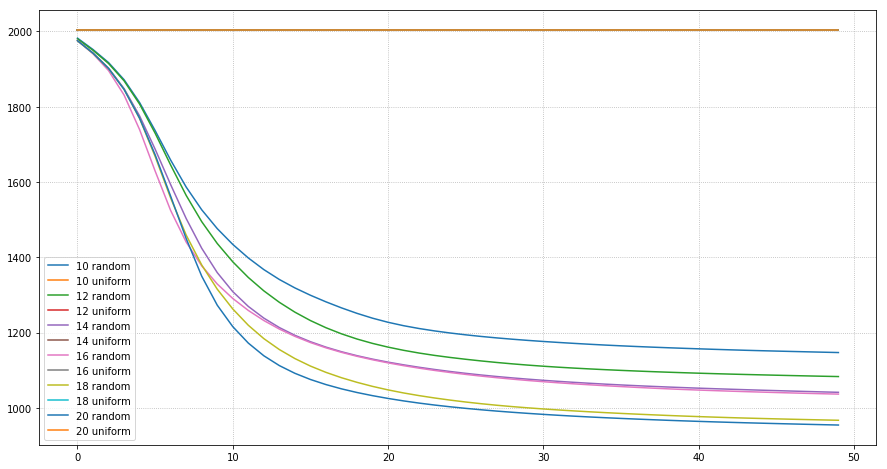

In [396]:
plt.figure(figsize=(15, 8))
for i, configuration in enumerate(results):
    plt.plot(np.arange(50), results[i][2], label = str(results[i][0]) + ' ' + str(results[i][1]))
    
plt.legend()
plt.grid(ls=':')
plt.show()

Тааакс, ну, получили, что равномерное распределение не очень. При равномерной инициализации перплексия вообще не изменяется для любого кол-ва тем, что говорит о том, что скорей всего наше разложение на 2 матрицы не изменяется с итерациями. 

А вот рандомное работает хорошо. Кроме того, можно заметить (и по графику, и по итоговым чиселкам), что с увеличением кол-ва тем перплексия заметно уменьшается.

### Модель LDA и визуализация

Модель [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) является наиболее популярной тематической моделью. Единственное отличие от модели PLSA заключается в введении априорных распределений Дирихле на столбцы матриц $\Phi$ и $\Theta$, которое может способствовать дополнительному сглаживанию или разреживанию параметров.

В этом задании предлагается воспользоваться реализацией модели [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html), обучение которой основано на вариационном байесовском выводе.

Выполнение задания потребует установки пакетов [gensim](https://radimrehurek.com/gensim/install.html) и [pyldavis 2.0](https://pyldavis.readthedocs.io/en/latest/readme.html#installation).


Для обучения *LdaModel* и её последующей визуализации потребуется словарь формата gensim, который можно получить следующей командой

    dictionary = gensim.corpora.Dictionary.from_corpus(corpora, vocab_dict)

где *corpora* содержит полученное с помощью gensim представление коллекции, а *vocab_dict* — это dict, полученный после работы CountVectorizer, ставящий в соответствие каждому номеру строки в матрице данных само слово в виде строки.

Подготовьте данные в формате, подходящем для *gensim* (полное [API](https://radimrehurek.com/gensim/apiref.html) gensim). [Пример обработки вывода](https://gist.github.com/aronwc/8248457) *CountVectorizer* для gensim.

In [6]:
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import Sparse2Corpus

vocab_dict = dict(zip(vectorizer.vocabulary_.values(), vectorizer.vocabulary_.keys()))

dictionary = Dictionary.from_corpus(Sparse2Corpus(vectorizer.transform(data)), vocab_dict)

**Задание 9. (1.5 балла)** Примените [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) к подготовленным данным (рекомендуется задать заведомо большое число итераций в параметре *passes*, например, 30). Визуально сравните полученные темы по топ-20 наиболее вероятным словам с темами, полученными вашей реализацией ЕМ-алгоритма (нерегуляризованного). Какая из моделей даёт более интерпретируемые темы и почему?

Возьмем 10 тем. Потом для сравнения с PLSA также посмотрим какие слова получается в PLSA при 10 темах.

In [7]:
common_corpus = [dictionary.doc2bow(text.split()) for text in data]
lda = LdaModel(common_corpus, num_topics=10, passes=40)

Посмотрим на слова в темах.

In [12]:
for topic in range(10):
    inds_words = np.array(lda.get_topic_terms(topic, 20))[:,0].astype(int)
    print('topic {}'.format(topic))
    words = [vocab_dict[ind] for ind in inds_words]
    print(words)

topic 0
['its', 'security', 'which', 'should', 'their', 'military', 'new', 'nuclear', 'government', 'international', 'could', 'support', 'including', 'need', 'other', 'no', 'officials', 'most', 'people', 'policy']
topic 1
['my', 'email', 'office', 'below', 'cdm', 'need', 'print', 'please', 'sent', 'note', 'copy', 'check', 'contact', 'got', 'sure', 'via', 'reach', 'message', 'phone', 'ok']
topic 2
['his', 'who', 'had', 'their', 'were', 'been', 'which', 'one', 'more', 'no', 'said', 'than', 'into', 'him', 'when', 'political', 'its', 'against', 'only', 'after']
topic 3
['her', 'she', 'when', 'back', 'had', 'my', 'go', 'very', 'next', 'meeting', 'did', 'like', 'going', 'want', 'could', 'come', 'meet', 'him', 'work', 'week']
topic 4
['women', 'people', 'were', 'them', 'over', 'their', 'one', 'how', 'good', 'when', 'first', 'much', 'health', 'who', 'work', 'many', 'off', 'met', 'wanted', 'help']
topic 5
['think', 'should', 'talk', 'him', 'tomorrow', 'draft', 'send', 'letter', 'discuss', 'befo

Здесь можно заметить, что,например, тема 5 похожа на какие-то обсуждение, переговоры. Тема 7 похожа на какие-то выборы. Тема 0 похожа на какие-то внешние переговоры, связи : support, government, international, military, security, officials.

Для сравнения посмотрим на PLSA с тем же кол-вом тем и с таким же кол-вом итераций.

In [424]:
plsa = PLSA(vectorize_data.T, count_topics=10, verbose=False)
plsa.EM(40)
indeces_most_popular = plsa.most_popular_words(20)

words = np.array(vectorizer.get_feature_names())
for topic in range(indeces_most_popular.shape[1]):
    print('topic {}'.format(topic))
    print(words[indeces_most_popular[:,topic]][::-1])

topic 0
['been' 'list' 'vote' 'people' 'had' 'make' 'more' 'them' 'were' 'our'
 'one' 'care' 'house' 'health' 'who' 'their' 'his' 'said' 'senate' 'bill']
topic 1
['were' 'republican' 'one' 'new' 'political' 'when' 'been' 'than' 'right'
 'more' 'president' 'said' 'clinton' 'she' 'obama' 'her' 'who' 'party'
 'had' 'his']
topic 2
['foia' 'waiver' 'select' 'comm' 'dept' 'produced' '13' 'sensitive'
 'house' 'agreement' '05' 'doc' 'department' 'date' 'case' 'subject'
 'information' 'benghazi' '2015' 'no']
topic 3
['diplomacy' 'american' 'ok' 'secretary' 'support' 'other' 'security'
 'which' 'international' 'government' 'foreign' 'its' 'new' 'us' 'world'
 'united' 'their' 'women' 'states' 'our']
topic 4
['iranian' 'support' '14' 'high' 'taliban' 'netanyahu' 'afghan' 'please'
 'vote' '18' 'jewish' '10' 'may' 'election' 'were' 'israeli' 'iran'
 'haiti' 'israel' 'percent']
topic 5
['morning' 'good' 'should' 'very' 'him' 'like' 'when' 'll' 'back' 'work'
 'our' 'her' 'she' 'talk' 'today' 'let' 'th

Здесь темы кажутся менее итерпретируемыми. Однако, также пожно заметить, что тема 3 - это какие-то внешние дела, а тема 7 - это какие-то переговоры. 

**Задание 10. (1.5 балл)** Визуализируйте модель из gensim с помощью библиотеки *ldavis* ([API](http://pyldavis.readthedocs.io/en/latest/modules/API.html) LDAvis для работы с gensim), [пример использования](https://github.com/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb).

Рассмотрим разное кол-во тем. Сначала посмотрим то, что получается в темах, если их кол-во 10

In [12]:
import pyLDAvis.gensim

prepared = pyLDAvis.gensim.prepare(lda, common_corpus, dictionary)
pyLDAvis.display(prepared)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Классно. Темы в принципе не сильно пересекаются. Кроме того, можно посмотрев на самые частые слова в классах (что мы уже и до этого сделали) можно опять же найти некоторые интерпретации к некоторым темам.

In [15]:
lda = LdaModel(common_corpus, num_topics=5, passes=40)

prepared = pyLDAvis.gensim.prepare(lda, common_corpus, dictionary)
pyLDAvis.display(prepared)

Размер каждой темы стал заметно больше. Все еще есть темы, которые пересекаются, но заметно пересекаются только 2 темы. Также можно заметить, что темы стали менее интерпретируемыми, что кажется более-менее логичным.